In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('spine.tif',0)

In [6]:
def transform(im, type, gamma=1):
    image_type = im.dtype
    max_type_value = np.iinfo(im.dtype).max
    im = np.array(im,image_type)
    min = np.min(im)
    max = np.max(im)
    if(type == 'powerlaw'):
        output = (max_type_value**(1-gamma))*(im**gamma)
        return output.astype(image_type)
    elif(type == 'stretching'):
        output = (im - min)/(max-min)*(max_type_value)
        return output.astype(image_type)

In [22]:
contrast = transform(image, 'stretching')
powerlaw = transform(image, 'powerlaw', 0.5)
con_pow = transform(contrast, 'powerlaw', 0.5)
pow_con = transform(powerlaw, 'stretching')

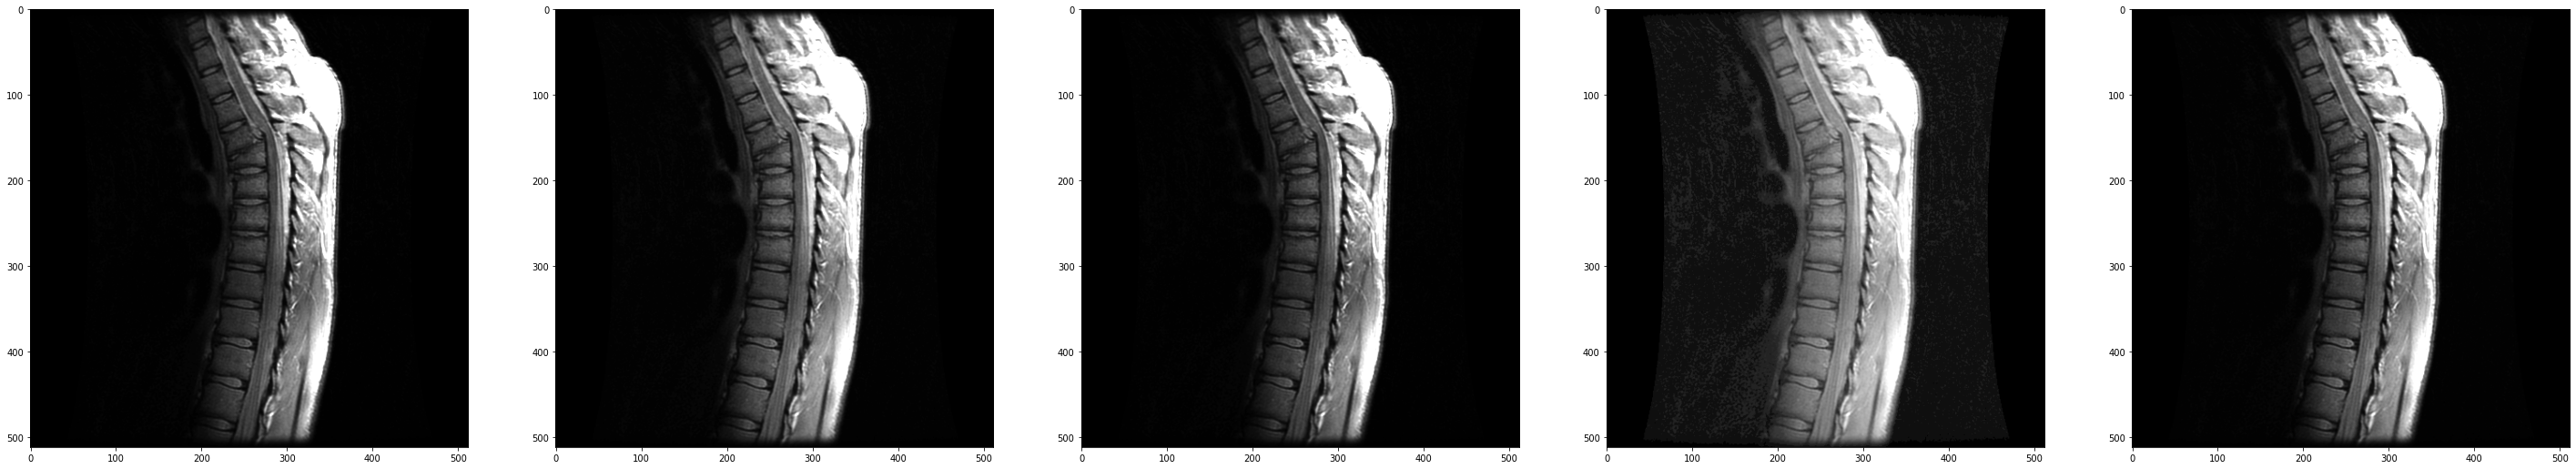

In [29]:
plt.figure(figsize=(50, 50))
plt.subplot(151), plt.imshow(contrast, cmap='gray')
plt.subplot(152), plt.imshow(powerlaw, cmap='gray')
plt.subplot(153), plt.imshow(image, cmap='gray')
plt.subplot(154), plt.imshow(con_pow, cmap='gray')
plt.subplot(155), plt.imshow(pow_con, cmap='gray')
plt.show()

ترتیب انجام عملیات ها تغییر ایجاد میکند.